In [1]:
import keras
import tensorflow as tf
import glob
from pathlib import Path
from astropy.io import fits
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout

Using TensorFlow backend.


In [2]:
print(tf.__version__)

2.0.0


# DFNN

In [9]:
galaxy = np.zeros(1600)
for filepath in glob.iglob('../Data/cutouts/galaxyfits/*fits', recursive=True):
    fp = Path(filepath)
    hdulist = fits.open(fp)
    scidata = hdulist[0].data
    scidata = scidata.flatten()
    galaxy = np.vstack((galaxy,scidata.transpose()))
galaxy = galaxy[1:,]
print(galaxy.shape)

(3123, 1600)


In [10]:
len(galaxy)

3123

In [11]:
ones = np.ones((len(galaxy),1))
galaxy = np.hstack((galaxy,ones))
print(galaxy)

[[ 26.60893512  60.82042313  30.41021156 ...  60.82042313 -19.00638223
    1.        ]
 [ 64.62169957  22.80765867 -11.40382934 ...  -7.60255289 -38.01276445
    1.        ]
 [ 48.78079796 115.3000679  -88.69235992 ... -53.21541595 -31.04232597
    1.        ]
 ...
 [  0.          69.7310257    8.71637821 ... -17.43275642  47.94008017
    1.        ]
 [  4.35818911  52.29826927  39.22370195 ... -30.50732374 -43.58189106
    1.        ]
 [ 21.79094553  47.94008017  78.44740391 ...  21.79094553 -61.01464748
    1.        ]]


In [12]:
star = np.zeros(1600)
count = 0
for filepath in glob.iglob('../Data/cutouts/starfits/*fits', recursive=True):
    fp = Path(filepath)
    hdulist = fits.open(fp)
    scidata = hdulist[0].data
    scidata = scidata.flatten()
    star = np.vstack((star,scidata.transpose()))
    count += 1
    if count == len(galaxy):
        break
star = star[1:,]
print(star.shape)

(3123, 1600)


In [13]:
zeros = np.zeros((len(star),1))
star = np.hstack((star,zeros))
print(star)

[[ 1.90063822e+01  3.80127645e+01  1.52051058e+01 ... -1.14038293e+02
   4.18140409e+01  0.00000000e+00]
 [ 4.99866815e-12  5.70191467e+01  1.14038293e+01 ... -1.10237017e+02
   4.99866815e-12  0.00000000e+00]
 [-3.80127645e+00  7.22242525e+01  7.60255289e+00 ... -7.60255289e+00
   4.94165938e+01  0.00000000e+00]
 ...
 [ 3.44787161e+01 -3.76131449e+01 -1.25377150e+01 ... -3.76131449e+01
  -3.13442874e+00  0.00000000e+00]
 [-3.13442874e+01  4.07475736e+01  2.19410012e+01 ... -3.13442874e+01
   3.13442874e+01  0.00000000e+00]
 [ 1.56721437e+01 -3.13442874e+01 -3.76131449e+01 ... -4.38820024e+01
   9.40328622e+00  0.00000000e+00]]


In [14]:
df = pd.DataFrame(np.vstack((galaxy,star)))

In [15]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600
count,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,...,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.00000
mean,17.498241,16.166994,17.030917,18.865960,19.642405,15.751126,12.082307,10.947788,10.674772,11.464448,...,11.416840,10.848935,10.765682,11.982885,12.248577,16.667663,21.197518,22.188929,21.904926,0.50000
std,789.364095,792.656985,788.375624,798.481783,664.580959,415.159451,221.475164,146.449387,230.554243,249.099017,...,117.041259,147.647160,217.965113,278.130590,293.304200,569.699828,996.746178,1005.059266,1010.097000,0.50004
min,-139.462051,-755.397326,-126.387484,-149.747497,-132.017389,-128.976402,-139.420083,-134.256376,-5601.224158,-2385.300271,...,-100.238349,-478.960832,-156.815577,-186.262546,-132.017389,-141.907776,-131.775187,-142.172573,-2543.053942,0.00000
25%,-18.806572,-18.806572,-18.806572,-18.806572,-18.806572,-18.612554,-18.612554,-18.806572,-18.806572,-18.612554,...,-17.432756,-17.906025,-18.806572,-18.806572,-18.612554,-18.806572,-18.806572,-18.806572,-18.806572,0.00000
50%,3.134429,2.923796,2.963288,3.008710,3.134429,3.134429,3.003340,3.134429,3.102092,3.134429,...,3.134429,3.134429,3.014081,3.134429,3.102092,3.134429,2.949377,2.956272,2.951470,0.50000
75%,25.075430,25.075430,25.075430,25.075430,25.075430,25.075430,25.075430,25.075430,25.075430,26.598812,...,25.075430,25.075430,25.075430,25.075430,24.112644,25.075430,24.483574,24.812742,23.611759,1.00000
max,61713.767453,62193.335050,61792.128171,62171.394049,49762.190669,29805.282884,15007.644805,6672.651478,15791.548860,18441.157375,...,5162.133413,9434.768137,15820.912566,20549.700464,19314.285619,41971.308360,77651.573605,78368.156918,78808.654020,1.00000


In [16]:
X = df.drop([1600],axis=1)
y = df[1600]
print(X,y)

           0           1          2          3             4           5     \
0     26.608935   60.820423  30.410212 -19.006382 -4.561532e+01   11.403829   
1     64.621700   22.807659 -11.403829  -3.801276  4.998668e-12  125.442123   
2     48.780798  115.300068 -88.692360 -35.476944 -3.552714e-15  -53.215416   
3      8.716378  -39.223702  13.074567  -4.358189 -3.486551e+01   17.432756   
4     -8.716378   17.432756  56.656458 -13.074567  6.537284e+01  -26.149135   
...         ...         ...        ...        ...           ...         ...   
6241   6.268857   -6.268857  25.075430 -12.537715  9.403286e+00   18.806572   
6242 -12.537715   75.226290   3.134429   9.403286 -2.820986e+01   -3.134429   
6243  34.478716  -37.613145 -12.537715  12.537715  6.268857e+00    6.268857   
6244 -31.344287   40.747574  21.941001  -6.268857  2.194100e+01   15.672144   
6245  15.672144  -31.344287 -37.613145 -34.478716  2.194100e+01   34.478716   

           6             7          8             9

In [17]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X)
transformer
transformer.transform(X)

array([[ 5.93621959e-05,  1.35685019e-04,  6.78425096e-05, ...,
         1.61125960e-04,  1.35685019e-04, -4.24015685e-05],
       [ 1.67091678e-04,  5.89735333e-05, -2.94867667e-05, ...,
         6.88024556e-05, -1.96578444e-05, -9.82892222e-05],
       [ 2.28522769e-04,  5.40144726e-04, -4.15495943e-04, ...,
        -2.28522769e-04, -2.49297566e-04, -1.45423580e-04],
       ...,
       [ 1.58349807e-03, -1.72745244e-03, -5.75817480e-04, ...,
         0.00000000e+00, -1.72745244e-03, -1.43954370e-04],
       [-2.35911285e-03,  3.06684671e-03,  1.65137900e-03, ...,
         3.53866928e-03, -2.35911285e-03,  2.35911285e-03],
       [ 6.55707920e-04, -1.31141584e-03, -1.57369901e-03, ...,
         0.00000000e+00, -1.83598218e-03,  3.93424752e-04]])

In [18]:
X = pd.DataFrame(transformer.transform(X))
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
count,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,...,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000
mean,0.000532,0.000486,0.000338,0.000296,0.000464,0.000487,0.000361,0.000509,0.000427,0.000288,...,0.000649,0.000550,0.000410,0.000222,0.000313,0.000460,0.000475,0.000501,0.000525,0.000699
std,0.013333,0.010730,0.009127,0.008808,0.009077,0.010037,0.012365,0.012497,0.012327,0.010209,...,0.010240,0.009897,0.009812,0.009531,0.009817,0.010328,0.010026,0.010827,0.012201,0.014302
min,-0.046769,-0.048820,-0.046747,-0.052804,-0.043172,-0.044975,-0.045145,-0.039824,-0.226332,-0.109372,...,-0.043176,-0.039813,-0.086491,-0.056570,-0.057899,-0.046037,-0.057203,-0.045459,-0.045208,-0.163675
25%,-0.001335,-0.001454,-0.001463,-0.001422,-0.001363,-0.001419,-0.001452,-0.001504,-0.001526,-0.001472,...,-0.001276,-0.001348,-0.001394,-0.001491,-0.001396,-0.001397,-0.001305,-0.001434,-0.001432,-0.001381
50%,0.000028,0.000009,0.000014,0.000019,0.000027,0.000030,0.000019,0.000035,0.000026,0.000045,...,0.000048,0.000047,0.000042,0.000019,0.000031,0.000024,0.000024,0.000012,0.000016,0.000011
75%,0.001716,0.001667,0.001618,0.001653,0.001638,0.001633,0.001526,0.001597,0.001476,0.001614,...,0.001796,0.001596,0.001631,0.001401,0.001592,0.001641,0.001656,0.001641,0.001589,0.001564
max,0.749077,0.477454,0.233318,0.194644,0.156820,0.315806,0.563615,0.499648,0.524072,0.381915,...,0.337170,0.348117,0.256195,0.249393,0.359902,0.464029,0.309904,0.416777,0.448118,0.496360


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [148]:
from keras import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(256, activation='relu', kernel_initializer='random_normal', input_dim=1600, ))
classifier.add(Dropout(0.5))
#Second  Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.5))
#Third  Hidden Layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.5))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
classifier.compile(optimizer ='Adadelta',loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=32, epochs=1000, shuffle=True, use_multiprocessing=True)

Epoch 1/1000
4996/4996 [==============================] - ETA: 24s - loss: 0.6931 - accuracy: 0.687 - ETA: 1s - loss: 0.6932 - accuracy: 0.513 - ETA: 0s - loss: 0.6931 - accuracy: 0.51 - ETA: 0s - loss: 0.6931 - accuracy: 0.50 - ETA: 0s - loss: 0.6931 - accuracy: 0.51 - ETA: 0s - loss: 0.6931 - accuracy: 0.50 - ETA: 0s - loss: 0.6931 - accuracy: 0.50 - ETA: 0s - loss: 0.6930 - accuracy: 0.50 - 1s 113us/step - loss: 0.6929 - accuracy: 0.5102
Epoch 2/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.6916 - accuracy: 0.46 - ETA: 0s - loss: 0.6918 - accuracy: 0.50 - ETA: 0s - loss: 0.6901 - accuracy: 0.53 - ETA: 0s - loss: 0.6892 - accuracy: 0.54 - ETA: 0s - loss: 0.6858 - accuracy: 0.55 - ETA: 0s - loss: 0.6776 - accuracy: 0.57 - ETA: 0s - loss: 0.6629 - accuracy: 0.59 - ETA: 0s - loss: 0.6466 - accuracy: 0.61 - ETA: 0s - loss: 0.6289 - accuracy: 0.63 - 0s 84us/step - loss: 0.6288 - accuracy: 0.6331
Epoch 3/1000
4996/4996 [==============================] - ETA: 0s - loss

4996/4996 [==============================] - ETA: 0s - loss: 0.0943 - accuracy: 0.96 - ETA: 0s - loss: 0.1839 - accuracy: 0.92 - ETA: 0s - loss: 0.1838 - accuracy: 0.92 - ETA: 0s - loss: 0.1795 - accuracy: 0.92 - ETA: 0s - loss: 0.1850 - accuracy: 0.92 - ETA: 0s - loss: 0.1880 - accuracy: 0.92 - ETA: 0s - loss: 0.1908 - accuracy: 0.92 - ETA: 0s - loss: 0.1884 - accuracy: 0.92 - 0s 81us/step - loss: 0.1902 - accuracy: 0.9227
Epoch 38/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.1888 - accuracy: 0.87 - ETA: 0s - loss: 0.2242 - accuracy: 0.90 - ETA: 0s - loss: 0.2087 - accuracy: 0.91 - ETA: 0s - loss: 0.2073 - accuracy: 0.91 - ETA: 0s - loss: 0.1958 - accuracy: 0.91 - ETA: 0s - loss: 0.1971 - accuracy: 0.91 - ETA: 0s - loss: 0.1984 - accuracy: 0.91 - ETA: 0s - loss: 0.1949 - accuracy: 0.91 - 0s 82us/step - loss: 0.1935 - accuracy: 0.9205
Epoch 39/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0960 - accuracy: 1.00 - ETA: 0s - loss: 0.1488 - accu

4996/4996 [==============================] - ETA: 0s - loss: 0.1280 - accuracy: 0.87 - ETA: 0s - loss: 0.1233 - accuracy: 0.93 - ETA: 0s - loss: 0.1412 - accuracy: 0.92 - ETA: 0s - loss: 0.1415 - accuracy: 0.93 - ETA: 0s - loss: 0.1415 - accuracy: 0.93 - ETA: 0s - loss: 0.1561 - accuracy: 0.93 - ETA: 0s - loss: 0.1581 - accuracy: 0.93 - ETA: 0s - loss: 0.1612 - accuracy: 0.93 - ETA: 0s - loss: 0.1599 - accuracy: 0.93 - 0s 92us/step - loss: 0.1586 - accuracy: 0.9343
Epoch 74/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.1508 - accuracy: 0.87 - ETA: 0s - loss: 0.1479 - accuracy: 0.93 - ETA: 0s - loss: 0.1316 - accuracy: 0.93 - ETA: 0s - loss: 0.1439 - accuracy: 0.92 - ETA: 0s - loss: 0.1402 - accuracy: 0.92 - ETA: 0s - loss: 0.1411 - accuracy: 0.93 - ETA: 0s - loss: 0.1442 - accuracy: 0.93 - ETA: 0s - loss: 0.1591 - accuracy: 0.93 - 0s 82us/step - loss: 0.1591 - accuracy: 0.9295
Epoch 75/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.2423 - accu

4996/4996 [==============================] - ETA: 0s - loss: 0.1476 - accuracy: 0.81 - ETA: 0s - loss: 0.1280 - accuracy: 0.93 - ETA: 0s - loss: 0.1207 - accuracy: 0.94 - ETA: 0s - loss: 0.1272 - accuracy: 0.93 - ETA: 0s - loss: 0.1195 - accuracy: 0.93 - ETA: 0s - loss: 0.1299 - accuracy: 0.93 - ETA: 0s - loss: 0.1303 - accuracy: 0.93 - ETA: 0s - loss: 0.1412 - accuracy: 0.93 - ETA: 0s - loss: 0.1404 - accuracy: 0.93 - 0s 92us/step - loss: 0.1375 - accuracy: 0.9376
Epoch 110/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0534 - accuracy: 0.93 - ETA: 0s - loss: 0.1519 - accuracy: 0.92 - ETA: 0s - loss: 0.1449 - accuracy: 0.93 - ETA: 0s - loss: 0.1448 - accuracy: 0.93 - ETA: 0s - loss: 0.1442 - accuracy: 0.93 - ETA: 0s - loss: 0.1415 - accuracy: 0.93 - ETA: 0s - loss: 0.1460 - accuracy: 0.93 - ETA: 0s - loss: 0.1447 - accuracy: 0.93 - 0s 81us/step - loss: 0.1401 - accuracy: 0.9339
Epoch 111/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0778 - ac

4996/4996 [==============================] - ETA: 0s - loss: 0.1187 - accuracy: 0.93 - ETA: 0s - loss: 0.1034 - accuracy: 0.95 - ETA: 0s - loss: 0.1076 - accuracy: 0.95 - ETA: 0s - loss: 0.1140 - accuracy: 0.94 - ETA: 0s - loss: 0.1260 - accuracy: 0.94 - ETA: 0s - loss: 0.1242 - accuracy: 0.94 - ETA: 0s - loss: 0.1230 - accuracy: 0.94 - ETA: 0s - loss: 0.1256 - accuracy: 0.94 - ETA: 0s - loss: 0.1243 - accuracy: 0.94 - 0s 91us/step - loss: 0.1220 - accuracy: 0.9444
Epoch 146/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0255 - accuracy: 1.00 - ETA: 0s - loss: 0.1361 - accuracy: 0.93 - ETA: 0s - loss: 0.1190 - accuracy: 0.94 - ETA: 0s - loss: 0.1208 - accuracy: 0.94 - ETA: 0s - loss: 0.1166 - accuracy: 0.94 - ETA: 0s - loss: 0.1207 - accuracy: 0.94 - ETA: 0s - loss: 0.1234 - accuracy: 0.94 - ETA: 0s - loss: 0.1273 - accuracy: 0.94 - 0s 81us/step - loss: 0.1322 - accuracy: 0.9430
Epoch 147/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0657 - ac

4996/4996 [==============================] - ETA: 0s - loss: 0.1826 - accuracy: 0.93 - ETA: 0s - loss: 0.1213 - accuracy: 0.95 - ETA: 0s - loss: 0.1062 - accuracy: 0.94 - ETA: 0s - loss: 0.1049 - accuracy: 0.94 - ETA: 0s - loss: 0.1073 - accuracy: 0.94 - ETA: 0s - loss: 0.1063 - accuracy: 0.94 - ETA: 0s - loss: 0.1084 - accuracy: 0.94 - ETA: 0s - loss: 0.1090 - accuracy: 0.94 - 0s 81us/step - loss: 0.1078 - accuracy: 0.9444
Epoch 182/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.1590 - accuracy: 0.93 - ETA: 0s - loss: 0.1387 - accuracy: 0.92 - ETA: 0s - loss: 0.1250 - accuracy: 0.93 - ETA: 0s - loss: 0.1250 - accuracy: 0.93 - ETA: 0s - loss: 0.1220 - accuracy: 0.93 - ETA: 0s - loss: 0.1159 - accuracy: 0.94 - ETA: 0s - loss: 0.1134 - accuracy: 0.94 - ETA: 0s - loss: 0.1078 - accuracy: 0.94 - ETA: 0s - loss: 0.1049 - accuracy: 0.94 - 0s 90us/step - loss: 0.1081 - accuracy: 0.9446
Epoch 183/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.1184 - ac

4996/4996 [==============================] - ETA: 0s - loss: 0.0711 - accuracy: 0.93 - ETA: 0s - loss: 0.0962 - accuracy: 0.95 - ETA: 0s - loss: 0.1003 - accuracy: 0.95 - ETA: 0s - loss: 0.1014 - accuracy: 0.95 - ETA: 0s - loss: 0.0995 - accuracy: 0.94 - ETA: 0s - loss: 0.0979 - accuracy: 0.94 - ETA: 0s - loss: 0.0989 - accuracy: 0.94 - ETA: 0s - loss: 0.1023 - accuracy: 0.94 - 0s 80us/step - loss: 0.1023 - accuracy: 0.9440
Epoch 218/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.1070 - accuracy: 0.93 - ETA: 0s - loss: 0.1581 - accuracy: 0.94 - ETA: 0s - loss: 0.1456 - accuracy: 0.94 - ETA: 0s - loss: 0.1263 - accuracy: 0.94 - ETA: 0s - loss: 0.1199 - accuracy: 0.94 - ETA: 0s - loss: 0.1213 - accuracy: 0.94 - ETA: 0s - loss: 0.1170 - accuracy: 0.94 - ETA: 0s - loss: 0.1144 - accuracy: 0.94 - 0s 81us/step - loss: 0.1194 - accuracy: 0.9446
Epoch 219/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.1075 - accuracy: 0.90 - ETA: 0s - loss: 0.0782 - ac

4996/4996 [==============================] - ETA: 0s - loss: 0.0655 - accuracy: 0.96 - ETA: 0s - loss: 0.0948 - accuracy: 0.94 - ETA: 0s - loss: 0.0994 - accuracy: 0.95 - ETA: 0s - loss: 0.0940 - accuracy: 0.95 - ETA: 0s - loss: 0.1023 - accuracy: 0.94 - ETA: 0s - loss: 0.1034 - accuracy: 0.94 - ETA: 0s - loss: 0.1018 - accuracy: 0.94 - ETA: 0s - loss: 0.0999 - accuracy: 0.94 - 0s 80us/step - loss: 0.0998 - accuracy: 0.9476
Epoch 254/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.1217 - accuracy: 0.93 - ETA: 0s - loss: 0.1275 - accuracy: 0.93 - ETA: 0s - loss: 0.1244 - accuracy: 0.93 - ETA: 0s - loss: 0.1132 - accuracy: 0.93 - ETA: 0s - loss: 0.1046 - accuracy: 0.94 - ETA: 0s - loss: 0.1031 - accuracy: 0.94 - ETA: 0s - loss: 0.1032 - accuracy: 0.94 - ETA: 0s - loss: 0.1019 - accuracy: 0.94 - 0s 82us/step - loss: 0.1019 - accuracy: 0.9430
Epoch 255/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 1.00 - ETA: 0s - loss: 0.0914 - ac

4996/4996 [==============================] - ETA: 0s - loss: 0.0777 - accuracy: 0.93 - ETA: 0s - loss: 0.1103 - accuracy: 0.92 - ETA: 0s - loss: 0.1047 - accuracy: 0.93 - ETA: 0s - loss: 0.1048 - accuracy: 0.94 - ETA: 0s - loss: 0.0943 - accuracy: 0.94 - ETA: 0s - loss: 0.1013 - accuracy: 0.94 - ETA: 0s - loss: 0.1025 - accuracy: 0.94 - ETA: 0s - loss: 0.1067 - accuracy: 0.94 - 0s 81us/step - loss: 0.1076 - accuracy: 0.9432
Epoch 290/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0942 - accuracy: 0.90 - ETA: 0s - loss: 0.1026 - accuracy: 0.94 - ETA: 0s - loss: 0.0917 - accuracy: 0.95 - ETA: 0s - loss: 0.0935 - accuracy: 0.94 - ETA: 0s - loss: 0.1006 - accuracy: 0.94 - ETA: 0s - loss: 0.1049 - accuracy: 0.94 - ETA: 0s - loss: 0.1036 - accuracy: 0.94 - ETA: 0s - loss: 0.1004 - accuracy: 0.94 - ETA: 0s - loss: 0.1008 - accuracy: 0.94 - 0s 87us/step - loss: 0.0999 - accuracy: 0.9454
Epoch 291/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0574 - ac

4996/4996 [==============================] - ETA: 0s - loss: 0.0516 - accuracy: 0.96 - ETA: 0s - loss: 0.0783 - accuracy: 0.94 - ETA: 0s - loss: 0.0852 - accuracy: 0.94 - ETA: 0s - loss: 0.1058 - accuracy: 0.94 - ETA: 0s - loss: 0.1111 - accuracy: 0.94 - ETA: 0s - loss: 0.1183 - accuracy: 0.94 - ETA: 0s - loss: 0.1165 - accuracy: 0.94 - ETA: 0s - loss: 0.1128 - accuracy: 0.94 - 0s 81us/step - loss: 0.1114 - accuracy: 0.9428
Epoch 326/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.1311 - accuracy: 0.93 - ETA: 0s - loss: 0.0860 - accuracy: 0.94 - ETA: 0s - loss: 0.1033 - accuracy: 0.94 - ETA: 0s - loss: 0.1032 - accuracy: 0.94 - ETA: 0s - loss: 0.0981 - accuracy: 0.94 - ETA: 0s - loss: 0.1074 - accuracy: 0.94 - ETA: 0s - loss: 0.1092 - accuracy: 0.94 - ETA: 0s - loss: 0.1058 - accuracy: 0.94 - 0s 82us/step - loss: 0.1057 - accuracy: 0.9470
Epoch 327/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0691 - accuracy: 0.96 - ETA: 0s - loss: 0.0810 - ac

4996/4996 [==============================] - ETA: 0s - loss: 0.0261 - accuracy: 0.96 - ETA: 0s - loss: 0.0866 - accuracy: 0.95 - ETA: 0s - loss: 0.0961 - accuracy: 0.95 - ETA: 0s - loss: 0.0963 - accuracy: 0.94 - ETA: 0s - loss: 0.0940 - accuracy: 0.94 - ETA: 0s - loss: 0.0959 - accuracy: 0.94 - ETA: 0s - loss: 0.0912 - accuracy: 0.95 - ETA: 0s - loss: 0.0926 - accuracy: 0.95 - 0s 81us/step - loss: 0.0939 - accuracy: 0.9504
Epoch 362/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0327 - accuracy: 0.96 - ETA: 0s - loss: 0.0877 - accuracy: 0.94 - ETA: 0s - loss: 0.0834 - accuracy: 0.95 - ETA: 0s - loss: 0.0902 - accuracy: 0.94 - ETA: 0s - loss: 0.0912 - accuracy: 0.94 - ETA: 0s - loss: 0.0924 - accuracy: 0.94 - ETA: 0s - loss: 0.0925 - accuracy: 0.94 - ETA: 0s - loss: 0.0914 - accuracy: 0.94 - 0s 81us/step - loss: 0.0903 - accuracy: 0.9478
Epoch 363/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.96 - ETA: 0s - loss: 0.1000 - ac

Epoch 379/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.1272 - accuracy: 0.90 - ETA: 0s - loss: 0.1167 - accuracy: 0.93 - ETA: 0s - loss: 0.1073 - accuracy: 0.93 - ETA: 0s - loss: 0.0990 - accuracy: 0.94 - ETA: 0s - loss: 0.0968 - accuracy: 0.94 - ETA: 0s - loss: 0.0966 - accuracy: 0.94 - ETA: 0s - loss: 0.0992 - accuracy: 0.94 - ETA: 0s - loss: 0.1029 - accuracy: 0.94 - 0s 81us/step - loss: 0.1030 - accuracy: 0.9426
Epoch 380/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0793 - accuracy: 0.93 - ETA: 0s - loss: 0.1032 - accuracy: 0.94 - ETA: 0s - loss: 0.1051 - accuracy: 0.94 - ETA: 0s - loss: 0.1081 - accuracy: 0.93 - ETA: 0s - loss: 0.1031 - accuracy: 0.94 - ETA: 0s - loss: 0.1038 - accuracy: 0.94 - ETA: 0s - loss: 0.0996 - accuracy: 0.94 - ETA: 0s - loss: 0.0983 - accuracy: 0.94 - 0s 81us/step - loss: 0.0984 - accuracy: 0.9456
Epoch 381/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0607 - accuracy: 0.93 - ETA: 0s - lo

4996/4996 [==============================] - ETA: 0s - loss: 0.3509 - accuracy: 0.93 - ETA: 0s - loss: 0.1442 - accuracy: 0.94 - ETA: 0s - loss: 0.1152 - accuracy: 0.94 - ETA: 0s - loss: 0.1129 - accuracy: 0.94 - ETA: 0s - loss: 0.1062 - accuracy: 0.94 - ETA: 0s - loss: 0.1024 - accuracy: 0.94 - ETA: 0s - loss: 0.1006 - accuracy: 0.94 - ETA: 0s - loss: 0.0999 - accuracy: 0.94 - 0s 78us/step - loss: 0.0974 - accuracy: 0.9496
Epoch 416/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0657 - accuracy: 0.93 - ETA: 0s - loss: 0.1129 - accuracy: 0.95 - ETA: 0s - loss: 0.0963 - accuracy: 0.95 - ETA: 0s - loss: 0.0874 - accuracy: 0.95 - ETA: 0s - loss: 0.0893 - accuracy: 0.95 - ETA: 0s - loss: 0.0971 - accuracy: 0.94 - ETA: 0s - loss: 0.0949 - accuracy: 0.94 - ETA: 0s - loss: 0.0944 - accuracy: 0.95 - 0s 79us/step - loss: 0.0937 - accuracy: 0.9508
Epoch 417/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.1171 - accuracy: 0.93 - ETA: 0s - loss: 0.1044 - ac

4996/4996 [==============================] - ETA: 0s - loss: 0.0706 - accuracy: 0.93 - ETA: 0s - loss: 0.1028 - accuracy: 0.94 - ETA: 0s - loss: 0.0926 - accuracy: 0.95 - ETA: 0s - loss: 0.0960 - accuracy: 0.94 - ETA: 0s - loss: 0.0953 - accuracy: 0.94 - ETA: 0s - loss: 0.0945 - accuracy: 0.94 - ETA: 0s - loss: 0.0945 - accuracy: 0.94 - ETA: 0s - loss: 0.0965 - accuracy: 0.94 - 0s 83us/step - loss: 0.0956 - accuracy: 0.9460
Epoch 452/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.96 - ETA: 0s - loss: 0.0774 - accuracy: 0.95 - ETA: 0s - loss: 0.0718 - accuracy: 0.95 - ETA: 0s - loss: 0.0803 - accuracy: 0.95 - ETA: 0s - loss: 0.0897 - accuracy: 0.94 - ETA: 0s - loss: 0.0951 - accuracy: 0.94 - ETA: 0s - loss: 0.0941 - accuracy: 0.94 - ETA: 0s - loss: 0.0970 - accuracy: 0.94 - 0s 82us/step - loss: 0.0962 - accuracy: 0.9482
Epoch 453/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.1071 - accuracy: 0.90 - ETA: 0s - loss: 0.0804 - ac

4996/4996 [==============================] - ETA: 0s - loss: 0.0739 - accuracy: 0.96 - ETA: 0s - loss: 0.0787 - accuracy: 0.95 - ETA: 0s - loss: 0.0772 - accuracy: 0.95 - ETA: 0s - loss: 0.0840 - accuracy: 0.94 - ETA: 0s - loss: 0.0804 - accuracy: 0.94 - ETA: 0s - loss: 0.0841 - accuracy: 0.94 - ETA: 0s - loss: 0.0914 - accuracy: 0.94 - ETA: 0s - loss: 0.0920 - accuracy: 0.94 - 0s 82us/step - loss: 0.0896 - accuracy: 0.9472
Epoch 488/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0653 - accuracy: 0.96 - ETA: 0s - loss: 0.1043 - accuracy: 0.95 - ETA: 0s - loss: 0.1064 - accuracy: 0.93 - ETA: 0s - loss: 0.0983 - accuracy: 0.94 - ETA: 0s - loss: 0.1114 - accuracy: 0.94 - ETA: 0s - loss: 0.1053 - accuracy: 0.94 - ETA: 0s - loss: 0.1032 - accuracy: 0.94 - ETA: 0s - loss: 0.1041 - accuracy: 0.94 - 0s 81us/step - loss: 0.1036 - accuracy: 0.9488
Epoch 489/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.2640 - accuracy: 0.96 - ETA: 0s - loss: 0.0910 - ac

4996/4996 [==============================] - ETA: 0s - loss: 0.0706 - accuracy: 0.96 - ETA: 0s - loss: 0.0793 - accuracy: 0.95 - ETA: 0s - loss: 0.0872 - accuracy: 0.95 - ETA: 0s - loss: 0.0795 - accuracy: 0.95 - ETA: 0s - loss: 0.0837 - accuracy: 0.95 - ETA: 0s - loss: 0.0830 - accuracy: 0.94 - ETA: 0s - loss: 0.0859 - accuracy: 0.94 - ETA: 0s - loss: 0.0866 - accuracy: 0.94 - ETA: 0s - loss: 0.0831 - accuracy: 0.95 - 0s 85us/step - loss: 0.0831 - accuracy: 0.9504
Epoch 524/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.1228 - accuracy: 0.93 - ETA: 0s - loss: 0.0814 - accuracy: 0.95 - ETA: 0s - loss: 0.0818 - accuracy: 0.95 - ETA: 0s - loss: 0.0913 - accuracy: 0.95 - ETA: 0s - loss: 0.0992 - accuracy: 0.95 - ETA: 0s - loss: 0.1026 - accuracy: 0.95 - ETA: 0s - loss: 0.1019 - accuracy: 0.94 - ETA: 0s - loss: 0.1061 - accuracy: 0.94 - 0s 84us/step - loss: 0.1040 - accuracy: 0.9476
Epoch 525/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0906 - ac

4996/4996 [==============================] - ETA: 0s - loss: 0.0599 - accuracy: 0.96 - ETA: 0s - loss: 0.0927 - accuracy: 0.95 - ETA: 0s - loss: 0.0919 - accuracy: 0.94 - ETA: 0s - loss: 0.1011 - accuracy: 0.94 - ETA: 0s - loss: 0.0956 - accuracy: 0.94 - ETA: 0s - loss: 0.0972 - accuracy: 0.94 - ETA: 0s - loss: 0.0974 - accuracy: 0.94 - ETA: 0s - loss: 0.0944 - accuracy: 0.94 - 0s 81us/step - loss: 0.0971 - accuracy: 0.9452
Epoch 560/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.1296 - accuracy: 0.96 - ETA: 0s - loss: 0.1030 - accuracy: 0.95 - ETA: 0s - loss: 0.0978 - accuracy: 0.95 - ETA: 0s - loss: 0.1047 - accuracy: 0.94 - ETA: 0s - loss: 0.1044 - accuracy: 0.94 - ETA: 0s - loss: 0.1078 - accuracy: 0.94 - ETA: 0s - loss: 0.1054 - accuracy: 0.94 - ETA: 0s - loss: 0.1008 - accuracy: 0.94 - 0s 81us/step - loss: 0.1007 - accuracy: 0.9500
Epoch 561/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0059 - accuracy: 1.00 - ETA: 0s - loss: 0.1215 - ac

4996/4996 [==============================] - ETA: 0s - loss: 0.0892 - accuracy: 0.93 - ETA: 0s - loss: 0.0912 - accuracy: 0.93 - ETA: 0s - loss: 0.1006 - accuracy: 0.94 - ETA: 0s - loss: 0.0999 - accuracy: 0.94 - ETA: 0s - loss: 0.0951 - accuracy: 0.94 - ETA: 0s - loss: 0.0951 - accuracy: 0.94 - ETA: 0s - loss: 0.0965 - accuracy: 0.94 - ETA: 0s - loss: 0.0970 - accuracy: 0.94 - 0s 79us/step - loss: 0.0965 - accuracy: 0.9446
Epoch 596/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0541 - accuracy: 1.00 - ETA: 0s - loss: 0.1178 - accuracy: 0.93 - ETA: 0s - loss: 0.0995 - accuracy: 0.94 - ETA: 0s - loss: 0.0930 - accuracy: 0.94 - ETA: 0s - loss: 0.0927 - accuracy: 0.94 - ETA: 0s - loss: 0.0966 - accuracy: 0.94 - ETA: 0s - loss: 0.0934 - accuracy: 0.94 - ETA: 0s - loss: 0.0957 - accuracy: 0.94 - 0s 81us/step - loss: 0.0929 - accuracy: 0.9484
Epoch 597/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0875 - accuracy: 0.90 - ETA: 0s - loss: 0.1040 - ac

4996/4996 [==============================] - ETA: 0s - loss: 0.1667 - accuracy: 0.93 - ETA: 0s - loss: 0.0846 - accuracy: 0.96 - ETA: 0s - loss: 0.0939 - accuracy: 0.95 - ETA: 0s - loss: 0.0905 - accuracy: 0.95 - ETA: 0s - loss: 0.0910 - accuracy: 0.95 - ETA: 0s - loss: 0.0899 - accuracy: 0.95 - ETA: 0s - loss: 0.0952 - accuracy: 0.95 - ETA: 0s - loss: 0.0921 - accuracy: 0.95 - 0s 79us/step - loss: 0.0919 - accuracy: 0.9578
Epoch 632/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.1049 - accuracy: 0.90 - ETA: 0s - loss: 0.0900 - accuracy: 0.95 - ETA: 0s - loss: 0.0809 - accuracy: 0.95 - ETA: 0s - loss: 0.0856 - accuracy: 0.94 - ETA: 0s - loss: 0.0856 - accuracy: 0.95 - ETA: 0s - loss: 0.0875 - accuracy: 0.94 - ETA: 0s - loss: 0.0929 - accuracy: 0.94 - ETA: 0s - loss: 0.0957 - accuracy: 0.94 - 0s 78us/step - loss: 0.0953 - accuracy: 0.9494
Epoch 633/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.1085 - accuracy: 0.90 - ETA: 0s - loss: 0.1034 - ac

4996/4996 [==============================] - ETA: 0s - loss: 0.0840 - accuracy: 0.96 - ETA: 0s - loss: 0.0880 - accuracy: 0.95 - ETA: 0s - loss: 0.0790 - accuracy: 0.95 - ETA: 0s - loss: 0.0814 - accuracy: 0.95 - ETA: 0s - loss: 0.0910 - accuracy: 0.94 - ETA: 0s - loss: 0.0880 - accuracy: 0.94 - ETA: 0s - loss: 0.0859 - accuracy: 0.94 - ETA: 0s - loss: 0.0871 - accuracy: 0.94 - 0s 83us/step - loss: 0.0902 - accuracy: 0.9478
Epoch 668/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0280 - accuracy: 0.96 - ETA: 0s - loss: 0.0964 - accuracy: 0.95 - ETA: 0s - loss: 0.0893 - accuracy: 0.94 - ETA: 0s - loss: 0.0897 - accuracy: 0.95 - ETA: 0s - loss: 0.0907 - accuracy: 0.95 - ETA: 0s - loss: 0.0880 - accuracy: 0.95 - ETA: 0s - loss: 0.0870 - accuracy: 0.95 - ETA: 0s - loss: 0.0891 - accuracy: 0.95 - 0s 82us/step - loss: 0.0903 - accuracy: 0.9502
Epoch 669/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0700 - accuracy: 0.96 - ETA: 0s - loss: 0.1391 - ac

4996/4996 [==============================] - ETA: 0s - loss: 0.0474 - accuracy: 0.96 - ETA: 0s - loss: 0.0699 - accuracy: 0.95 - ETA: 0s - loss: 0.0762 - accuracy: 0.95 - ETA: 0s - loss: 0.0801 - accuracy: 0.95 - ETA: 0s - loss: 0.0784 - accuracy: 0.94 - ETA: 0s - loss: 0.0841 - accuracy: 0.94 - ETA: 0s - loss: 0.0810 - accuracy: 0.95 - ETA: 0s - loss: 0.0801 - accuracy: 0.95 - 0s 83us/step - loss: 0.0820 - accuracy: 0.9508
Epoch 704/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 1.00 - ETA: 0s - loss: 0.0674 - accuracy: 0.96 - ETA: 0s - loss: 0.0798 - accuracy: 0.95 - ETA: 0s - loss: 0.0752 - accuracy: 0.95 - ETA: 0s - loss: 0.0826 - accuracy: 0.95 - ETA: 0s - loss: 0.0847 - accuracy: 0.95 - ETA: 0s - loss: 0.0884 - accuracy: 0.95 - ETA: 0s - loss: 0.0860 - accuracy: 0.95 - 0s 82us/step - loss: 0.0898 - accuracy: 0.9490
Epoch 705/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.1247 - accuracy: 0.93 - ETA: 0s - loss: 0.0995 - ac

4996/4996 [==============================] - ETA: 0s - loss: 0.1087 - accuracy: 0.87 - ETA: 0s - loss: 0.0775 - accuracy: 0.94 - ETA: 0s - loss: 0.0941 - accuracy: 0.94 - ETA: 0s - loss: 0.0945 - accuracy: 0.94 - ETA: 0s - loss: 0.0974 - accuracy: 0.94 - ETA: 0s - loss: 0.0957 - accuracy: 0.94 - ETA: 0s - loss: 0.0928 - accuracy: 0.94 - ETA: 0s - loss: 0.0950 - accuracy: 0.94 - 0s 83us/step - loss: 0.0957 - accuracy: 0.9478
Epoch 740/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.96 - ETA: 0s - loss: 0.1089 - accuracy: 0.95 - ETA: 0s - loss: 0.1028 - accuracy: 0.95 - ETA: 0s - loss: 0.1013 - accuracy: 0.94 - ETA: 0s - loss: 0.0959 - accuracy: 0.95 - ETA: 0s - loss: 0.1002 - accuracy: 0.94 - ETA: 0s - loss: 0.0968 - accuracy: 0.94 - ETA: 0s - loss: 0.0957 - accuracy: 0.95 - 0s 80us/step - loss: 0.0942 - accuracy: 0.9502
Epoch 741/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.1136 - accuracy: 0.96 - ETA: 0s - loss: 0.0920 - ac

Epoch 774/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0848 - accuracy: 0.96 - ETA: 0s - loss: 0.0969 - accuracy: 0.94 - ETA: 0s - loss: 0.0873 - accuracy: 0.94 - ETA: 0s - loss: 0.0950 - accuracy: 0.94 - ETA: 0s - loss: 0.0949 - accuracy: 0.94 - ETA: 0s - loss: 0.0970 - accuracy: 0.94 - ETA: 0s - loss: 0.0943 - accuracy: 0.94 - ETA: 0s - loss: 0.0926 - accuracy: 0.94 - ETA: 0s - loss: 0.0916 - accuracy: 0.94 - 0s 85us/step - loss: 0.0915 - accuracy: 0.9460
Epoch 775/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0720 - accuracy: 1.00 - ETA: 0s - loss: 0.1006 - accuracy: 0.94 - ETA: 0s - loss: 0.0876 - accuracy: 0.94 - ETA: 0s - loss: 0.0861 - accuracy: 0.94 - ETA: 0s - loss: 0.0869 - accuracy: 0.94 - ETA: 0s - loss: 0.0878 - accuracy: 0.94 - ETA: 0s - loss: 0.0883 - accuracy: 0.94 - ETA: 0s - loss: 0.0868 - accuracy: 0.94 - 0s 79us/step - loss: 0.0870 - accuracy: 0.9468
Epoch 776/1000
4996/4996 [==============================] - ETA: 0s - lo

4996/4996 [==============================] - ETA: 0s - loss: 0.0978 - accuracy: 0.93 - ETA: 0s - loss: 0.0997 - accuracy: 0.94 - ETA: 0s - loss: 0.1044 - accuracy: 0.94 - ETA: 0s - loss: 0.0946 - accuracy: 0.94 - ETA: 0s - loss: 0.0914 - accuracy: 0.94 - ETA: 0s - loss: 0.0896 - accuracy: 0.94 - ETA: 0s - loss: 0.0860 - accuracy: 0.94 - ETA: 0s - loss: 0.0857 - accuracy: 0.94 - 0s 79us/step - loss: 0.0881 - accuracy: 0.9478
Epoch 811/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 1.00 - ETA: 0s - loss: 0.0863 - accuracy: 0.93 - ETA: 0s - loss: 0.0712 - accuracy: 0.95 - ETA: 0s - loss: 0.0824 - accuracy: 0.94 - ETA: 0s - loss: 0.0812 - accuracy: 0.94 - ETA: 0s - loss: 0.0854 - accuracy: 0.94 - ETA: 0s - loss: 0.0896 - accuracy: 0.94 - ETA: 0s - loss: 0.0890 - accuracy: 0.94 - 0s 80us/step - loss: 0.0879 - accuracy: 0.9438
Epoch 812/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0799 - accuracy: 0.96 - ETA: 0s - loss: 0.0815 - ac

4996/4996 [==============================] - ETA: 0s - loss: 0.0897 - accuracy: 0.93 - ETA: 0s - loss: 0.1030 - accuracy: 0.93 - ETA: 0s - loss: 0.0859 - accuracy: 0.95 - ETA: 0s - loss: 0.0905 - accuracy: 0.95 - ETA: 0s - loss: 0.0867 - accuracy: 0.95 - ETA: 0s - loss: 0.0851 - accuracy: 0.95 - ETA: 0s - loss: 0.0848 - accuracy: 0.95 - ETA: 0s - loss: 0.0865 - accuracy: 0.95 - 0s 79us/step - loss: 0.0871 - accuracy: 0.9510
Epoch 847/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0639 - accuracy: 1.00 - ETA: 0s - loss: 0.0769 - accuracy: 0.95 - ETA: 0s - loss: 0.0788 - accuracy: 0.95 - ETA: 0s - loss: 0.0744 - accuracy: 0.95 - ETA: 0s - loss: 0.0742 - accuracy: 0.95 - ETA: 0s - loss: 0.0772 - accuracy: 0.95 - ETA: 0s - loss: 0.0836 - accuracy: 0.95 - ETA: 0s - loss: 0.0843 - accuracy: 0.95 - 0s 82us/step - loss: 0.0860 - accuracy: 0.9518
Epoch 848/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0959 - accuracy: 1.00 - ETA: 0s - loss: 0.0810 - ac

4996/4996 [==============================] - ETA: 0s - loss: 0.0680 - accuracy: 0.96 - ETA: 0s - loss: 0.0721 - accuracy: 0.96 - ETA: 0s - loss: 0.0839 - accuracy: 0.95 - ETA: 0s - loss: 0.0863 - accuracy: 0.95 - ETA: 0s - loss: 0.0843 - accuracy: 0.95 - ETA: 0s - loss: 0.0886 - accuracy: 0.94 - ETA: 0s - loss: 0.0910 - accuracy: 0.94 - ETA: 0s - loss: 0.0924 - accuracy: 0.94 - 0s 77us/step - loss: 0.0935 - accuracy: 0.9464
Epoch 883/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0720 - accuracy: 0.93 - ETA: 0s - loss: 0.0684 - accuracy: 0.93 - ETA: 0s - loss: 0.0827 - accuracy: 0.94 - ETA: 0s - loss: 0.0854 - accuracy: 0.94 - ETA: 0s - loss: 0.0881 - accuracy: 0.94 - ETA: 0s - loss: 0.0878 - accuracy: 0.94 - ETA: 0s - loss: 0.0851 - accuracy: 0.94 - ETA: 0s - loss: 0.0834 - accuracy: 0.94 - 0s 78us/step - loss: 0.0837 - accuracy: 0.9476
Epoch 884/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0240 - accuracy: 1.00 - ETA: 0s - loss: 0.0950 - ac

4996/4996 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.96 - ETA: 0s - loss: 0.0922 - accuracy: 0.94 - ETA: 0s - loss: 0.0841 - accuracy: 0.94 - ETA: 0s - loss: 0.0868 - accuracy: 0.94 - ETA: 0s - loss: 0.0875 - accuracy: 0.94 - ETA: 0s - loss: 0.0937 - accuracy: 0.94 - ETA: 0s - loss: 0.0911 - accuracy: 0.94 - ETA: 0s - loss: 0.0909 - accuracy: 0.94 - ETA: 0s - loss: 0.0899 - accuracy: 0.94 - 0s 87us/step - loss: 0.0915 - accuracy: 0.9448
Epoch 919/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0900 - accuracy: 0.90 - ETA: 0s - loss: 0.0780 - accuracy: 0.94 - ETA: 0s - loss: 0.0833 - accuracy: 0.95 - ETA: 0s - loss: 0.0838 - accuracy: 0.94 - ETA: 0s - loss: 0.0852 - accuracy: 0.94 - ETA: 0s - loss: 0.0930 - accuracy: 0.94 - ETA: 0s - loss: 0.0937 - accuracy: 0.94 - ETA: 0s - loss: 0.0959 - accuracy: 0.94 - 0s 81us/step - loss: 0.0952 - accuracy: 0.9428
Epoch 920/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0877 - ac

4996/4996 [==============================] - ETA: 0s - loss: 0.0707 - accuracy: 0.93 - ETA: 0s - loss: 0.0763 - accuracy: 0.95 - ETA: 0s - loss: 0.0953 - accuracy: 0.95 - ETA: 0s - loss: 0.0927 - accuracy: 0.95 - ETA: 0s - loss: 0.0911 - accuracy: 0.95 - ETA: 0s - loss: 0.0903 - accuracy: 0.95 - ETA: 0s - loss: 0.0896 - accuracy: 0.95 - ETA: 0s - loss: 0.0877 - accuracy: 0.95 - ETA: 0s - loss: 0.0882 - accuracy: 0.95 - 0s 87us/step - loss: 0.0873 - accuracy: 0.9514
Epoch 955/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0551 - accuracy: 0.93 - ETA: 0s - loss: 0.0792 - accuracy: 0.94 - ETA: 0s - loss: 0.0760 - accuracy: 0.94 - ETA: 0s - loss: 0.0875 - accuracy: 0.94 - ETA: 0s - loss: 0.0886 - accuracy: 0.94 - ETA: 0s - loss: 0.0885 - accuracy: 0.94 - ETA: 0s - loss: 0.0897 - accuracy: 0.94 - ETA: 0s - loss: 0.0869 - accuracy: 0.94 - 0s 82us/step - loss: 0.0889 - accuracy: 0.9484
Epoch 956/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.1273 - ac

4996/4996 [==============================] - ETA: 0s - loss: 0.1109 - accuracy: 0.90 - ETA: 0s - loss: 0.1047 - accuracy: 0.94 - ETA: 0s - loss: 0.1004 - accuracy: 0.94 - ETA: 0s - loss: 0.0989 - accuracy: 0.94 - ETA: 0s - loss: 0.0956 - accuracy: 0.94 - ETA: 0s - loss: 0.0911 - accuracy: 0.94 - ETA: 0s - loss: 0.0982 - accuracy: 0.94 - ETA: 0s - loss: 0.0989 - accuracy: 0.94 - 0s 80us/step - loss: 0.0968 - accuracy: 0.9464
Epoch 991/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0993 - accuracy: 0.93 - ETA: 0s - loss: 0.0864 - accuracy: 0.95 - ETA: 0s - loss: 0.0981 - accuracy: 0.95 - ETA: 0s - loss: 0.0918 - accuracy: 0.95 - ETA: 0s - loss: 0.0886 - accuracy: 0.95 - ETA: 0s - loss: 0.0902 - accuracy: 0.95 - ETA: 0s - loss: 0.0896 - accuracy: 0.95 - ETA: 0s - loss: 0.0908 - accuracy: 0.95 - 0s 81us/step - loss: 0.0894 - accuracy: 0.9506
Epoch 992/1000
4996/4996 [==============================] - ETA: 0s - loss: 0.0970 - accuracy: 0.93 - ETA: 0s - loss: 0.0713 - ac

In [149]:
classifier.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               409856    
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 520       
_________________________________________________________________
dropout_17 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                

In [150]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

4996/4996 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - 0s 42us/step


In [151]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[522 132]
 [ 78 518]]


In [152]:
def MCC(matrix):
    '''
    Calcualtes the Matthews Correlation Coefficient from a confusion matrix
    '''
    return ((matrix[0,0]*matrix[1,1])-(matrix[1,0]*matrix[0,1]))/np.sqrt((cm[0,0]+cm[1,0])*(cm[0,0]+cm[0,1])*(cm[1,1]+cm[1,0])*(cm[1,1]+cm[0,1]))

In [153]:
print("Error Rate:"+'{:.3%}'.format((cm[0,1]+cm[1,0])/np.sum(cm)))
print("Accuracy:"+'{:.3%}'.format((cm[0,0]+cm[1,1])/np.sum(cm)))
print("Sensitivity:"+'{:.3%}'.format((cm[0,0])/np.sum(cm[0,:])))
print("Specificity :"+'{:.3%}'.format((cm[1,1])/np.sum(cm[1,:])))
print("Precision:"+'{:.3%}'.format((cm[0,0])/np.sum(cm[:,0])))
print("False Positive Rate:"+'{:.3%}'.format(1-((cm[1,1])/np.sum(cm[1,:]))))
print("Matthews Correlation Coefficient:"+'{:.3%}'.format(MCC(cm)))

Error Rate:16.800%
Accuracy:83.200%
Sensitivity:79.817%
Specificity :86.913%
Precision:87.000%
False Positive Rate:13.087%
Matthews Correlation Coefficient:66.711%


# CNN

In [3]:
galaxy = np.zeros((40,40))
for filepath in glob.iglob('../Data/cutouts/galaxyfits/*fits', recursive=True):
    fp = Path(filepath)
    hdulist = fits.open(fp)
    scidata = hdulist[0].data
    galaxy = np.dstack((galaxy,scidata))
galaxy = galaxy[:,:,1:]
print(galaxy.shape[2])

3123


In [4]:
star = np.zeros((40,40))
count = 0
for filepath in glob.iglob('../Data/cutouts/starfits/*fits', recursive=True):
    fp = Path(filepath)
    hdulist = fits.open(fp)
    scidata = hdulist[0].data
    scidata = scidata
    star = np.dstack((star,scidata))
    count += 1
    if count == galaxy.shape[2]:
        break
star = star[:,:,1:]
print(star.shape)

(40, 40, 3123)


In [5]:
X = np.dstack((galaxy,star))
y = np.dstack((np.ones((1,1,galaxy.shape[2])),np.zeros((1,1,galaxy.shape[2]))))
print(X.shape)

(40, 40, 6246)


In [6]:
X = np.moveaxis(X, -1, 0)
y = np.moveaxis(y, -1, 0)

In [7]:
print(y.shape)

(6246, 1, 1)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [10]:
X_train = X_train.reshape(len(X_train),40,40,1)
X_test = X_test.reshape(len(X_test),40,40,1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#create model
model = Sequential()
#add model layers
model.add(Conv2D(16, kernel_size=5, activation='relu', input_shape=(40,40,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='random_normal'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
#Compiling the neural network
model.compile(optimizer ='Adadelta',loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
model.fit(X_train,y_train, batch_size=32, epochs=1, shuffle=True, use_multiprocessing=True)

Epoch 1/1
 160/4996 [..............................] - ETA: 48s - loss: 205.7355 - accuracy: 0.6000 

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='../Figures/CNN_model.png',show_shapes=True, show_layer_names=True)

In [11]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#create model
model = Sequential()
#add model layers
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(40,40,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=5, activation='relu',strides=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=5, activation='relu',strides=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
#Compiling the neural network
model.compile(optimizer ='Adam',loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
model.fit(X_train,y_train, batch_size=32, epochs=1, shuffle=True, use_multiprocessing=True)

Epoch 1/1
4996/4996 [==============================] - 19s 4ms/step - loss: 6.0392 - accuracy: 0.5867


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 38, 38, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)         

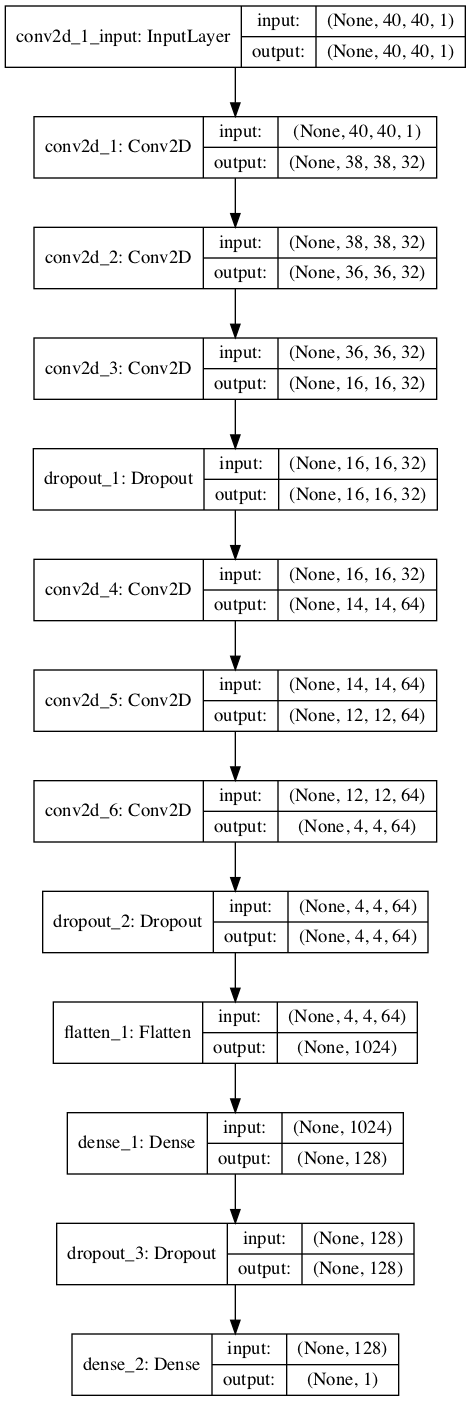

In [16]:
from keras.utils import plot_model
plot_model(model, to_file='../Figures/CNN_model.png',show_shapes=True, show_layer_names=True)

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig('../Figures/CNN_accuracy.png')
plt.show()

In [ ]:
eval_model=model.evaluate(X_train, y_train)
eval_model
y_pred=model.predict(X_test)
y_pred =(y_pred>0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
print(cm[0,1])

In [ ]:
def MCC(matrix):
    '''
    Calcualtes the Matthews Correlation Coefficient from a confusion matrix
    '''
    return ((matrix[0,0]*matrix[1,1])-(matrix[1,0]*matrix[0,1]))/np.sqrt((cm[0,0]+cm[1,0])*(cm[0,0]+cm[0,1])*(cm[1,1]+cm[1,0])*(cm[1,1]+cm[0,1]))

In [ ]:
print("Error Rate:"+'{:.3%}'.format((cm[0,1]+cm[1,0])/np.sum(cm)))
print("Accuracy:"+'{:.3%}'.format((cm[0,0]+cm[1,1])/np.sum(cm)))
print("Sensitivity:"+'{:.3%}'.format((cm[0,0])/np.sum(cm[0,:])))
print("Specificity :"+'{:.3%}'.format((cm[1,1])/np.sum(cm[1,:])))
print("Precision:"+'{:.3%}'.format((cm[0,0])/np.sum(cm[:,0])))
print("False Positive Rate:"+'{:.3%}'.format(1-((cm[1,1])/np.sum(cm[1,:]))))
print("Matthews Correlation Coefficient:"+'{:.3%}'.format(MCC(cm)))

In [ ]:
model.save('../Models/CNN_model.h5')

## Sanity Check

In [ ]:
for filepath in glob.iglob('../Data/cutouts/starfits/*fits', recursive=True):
    fp = Path(filepath)
    hdulist = fits.open(fp)
    scidata = hdulist[0].data
    

In [179]:
filepath = '../Data/cutouts/starfits/starfits-256.fits'
fp = Path(filepath)
hdulist = fits.open(fp)
scidata = hdulist[0].data

In [181]:
# Stars should return 0, galaxies return 1
model.predict(scidata.reshape(1,40,40,1))

array([[0.36742818]], dtype=float32)

In [30]:
tf.__version__

'2.1.0'

In [1]:
print(X)

NameError: name 'X' is not defined

# Autokeras

In [163]:
import autokeras as ak

# Initialize the image classifier.
clf = ak.ImageClassifier()
# Feed the image classifier with training data.
clf.fit(X_train, y_train)

# Predict with the best model.
predicted_y = clf.predict(X_test)
print(predicted_y)

# Evaluate the best model with testing data.
print(clf.evaluate(X_test, y_test))

Train for 125 steps, validate for 32 steps
Epoch 1/1000
125/125 [==============================] - ETA: 53s - loss: 0.7693 - accuracy: 0.437 - ETA: 4s - loss: 0.5806 - accuracy: 0.645 - ETA: 2s - loss: 0.5931 - accuracy: 0.65 - ETA: 1s - loss: 0.5914 - accuracy: 0.65 - ETA: 0s - loss: 0.5795 - accuracy: 0.66 - ETA: 0s - loss: 0.5759 - accuracy: 0.66 - ETA: 0s - loss: 0.5747 - accuracy: 0.67 - ETA: 0s - loss: 0.5720 - accuracy: 0.67 - ETA: 0s - loss: 0.5700 - accuracy: 0.67 - ETA: 0s - loss: 0.5691 - accuracy: 0.68 - 1s 10ms/step - loss: 0.5686 - accuracy: 0.6800 - val_loss: 0.5803 - val_accuracy: 0.6997
Epoch 2/1000
125/125 [==============================] - ETA: 3s - loss: 0.4150 - accuracy: 0.71 - ETA: 0s - loss: 0.5196 - accuracy: 0.72 - ETA: 0s - loss: 0.5432 - accuracy: 0.69 - ETA: 0s - loss: 0.5454 - accuracy: 0.70 - ETA: 0s - loss: 0.5393 - accuracy: 0.71 - ETA: 0s - loss: 0.5360 - accuracy: 0.71 - ETA: 0s - loss: 0.5324 - accuracy: 0.71 - ETA: 0s - loss: 0.5332 - accuracy: 0.71

125/125 [==============================] - ETA: 3s - loss: 0.2455 - accuracy: 0.90 - ETA: 0s - loss: 0.1884 - accuracy: 0.94 - ETA: 0s - loss: 0.1898 - accuracy: 0.93 - ETA: 0s - loss: 0.2040 - accuracy: 0.93 - ETA: 0s - loss: 0.2054 - accuracy: 0.92 - ETA: 0s - loss: 0.2041 - accuracy: 0.92 - ETA: 0s - loss: 0.2081 - accuracy: 0.92 - ETA: 0s - loss: 0.2134 - accuracy: 0.92 - ETA: 0s - loss: 0.2102 - accuracy: 0.92 - ETA: 0s - loss: 0.2080 - accuracy: 0.92 - 1s 5ms/step - loss: 0.2085 - accuracy: 0.9269 - val_loss: 0.2215 - val_accuracy: 0.9199
Epoch 32/1000
125/125 [==============================] - ETA: 3s - loss: 0.2199 - accuracy: 0.90 - ETA: 0s - loss: 0.1835 - accuracy: 0.93 - ETA: 0s - loss: 0.1804 - accuracy: 0.93 - ETA: 0s - loss: 0.1874 - accuracy: 0.93 - ETA: 0s - loss: 0.1939 - accuracy: 0.93 - ETA: 0s - loss: 0.2000 - accuracy: 0.92 - ETA: 0s - loss: 0.2018 - accuracy: 0.92 - ETA: 0s - loss: 0.2071 - accuracy: 0.92 - ETA: 0s - loss: 0.2048 - accuracy: 0.92 - ETA: 0s - loss

Train for 125 steps, validate for 32 steps
Epoch 1/1000
125/125 [==============================] - ETA: 11:34 - loss: 0.6038 - accuracy: 0.687 - ETA: 3:50 - loss: 1.5287 - accuracy: 0.687 - ETA: 2:18 - loss: 1.2057 - accuracy: 0.63 - ETA: 1:38 - loss: 1.0812 - accuracy: 0.61 - ETA: 1:15 - loss: 0.9618 - accuracy: 0.60 - ETA: 1:01 - loss: 0.8859 - accuracy: 0.62 - ETA: 51s - loss: 0.8541 - accuracy: 0.6418 - ETA: 44s - loss: 0.8404 - accuracy: 0.633 - ETA: 39s - loss: 0.8151 - accuracy: 0.625 - ETA: 34s - loss: 0.8278 - accuracy: 0.615 - ETA: 31s - loss: 0.8242 - accuracy: 0.595 - ETA: 28s - loss: 0.8016 - accuracy: 0.604 - ETA: 25s - loss: 0.7851 - accuracy: 0.608 - ETA: 23s - loss: 0.7713 - accuracy: 0.608 - ETA: 21s - loss: 0.7601 - accuracy: 0.609 - ETA: 20s - loss: 0.7485 - accuracy: 0.610 - ETA: 18s - loss: 0.7430 - accuracy: 0.612 - ETA: 17s - loss: 0.7337 - accuracy: 0.615 - ETA: 16s - loss: 0.7271 - accuracy: 0.618 - ETA: 15s - loss: 0.7163 - accuracy: 0.624 - ETA: 14s - loss: 

Epoch 6/1000
125/125 [==============================] - ETA: 7s - loss: 0.2376 - accuracy: 0.93 - ETA: 4s - loss: 0.3133 - accuracy: 0.88 - ETA: 4s - loss: 0.2918 - accuracy: 0.88 - ETA: 4s - loss: 0.2956 - accuracy: 0.87 - ETA: 4s - loss: 0.2941 - accuracy: 0.87 - ETA: 4s - loss: 0.2887 - accuracy: 0.88 - ETA: 3s - loss: 0.2931 - accuracy: 0.88 - ETA: 3s - loss: 0.2959 - accuracy: 0.88 - ETA: 3s - loss: 0.3005 - accuracy: 0.87 - ETA: 3s - loss: 0.3042 - accuracy: 0.87 - ETA: 3s - loss: 0.3136 - accuracy: 0.87 - ETA: 3s - loss: 0.3100 - accuracy: 0.88 - ETA: 3s - loss: 0.2973 - accuracy: 0.88 - ETA: 3s - loss: 0.2931 - accuracy: 0.88 - ETA: 3s - loss: 0.2810 - accuracy: 0.89 - ETA: 3s - loss: 0.2784 - accuracy: 0.89 - ETA: 3s - loss: 0.2734 - accuracy: 0.89 - ETA: 3s - loss: 0.2791 - accuracy: 0.89 - ETA: 2s - loss: 0.2865 - accuracy: 0.89 - ETA: 2s - loss: 0.2808 - accuracy: 0.89 - ETA: 2s - loss: 0.2804 - accuracy: 0.89 - ETA: 2s - loss: 0.2762 - accuracy: 0.89 - ETA: 2s - loss: 0.27

Epoch 9/1000
125/125 [==============================] - ETA: 6s - loss: 0.2046 - accuracy: 0.93 - ETA: 4s - loss: 0.2807 - accuracy: 0.89 - ETA: 4s - loss: 0.2443 - accuracy: 0.91 - ETA: 4s - loss: 0.2617 - accuracy: 0.90 - ETA: 4s - loss: 0.2479 - accuracy: 0.90 - ETA: 3s - loss: 0.2369 - accuracy: 0.91 - ETA: 3s - loss: 0.2486 - accuracy: 0.90 - ETA: 3s - loss: 0.2497 - accuracy: 0.90 - ETA: 3s - loss: 0.2453 - accuracy: 0.90 - ETA: 3s - loss: 0.2520 - accuracy: 0.90 - ETA: 3s - loss: 0.2589 - accuracy: 0.90 - ETA: 3s - loss: 0.2543 - accuracy: 0.90 - ETA: 3s - loss: 0.2463 - accuracy: 0.91 - ETA: 3s - loss: 0.2437 - accuracy: 0.90 - ETA: 3s - loss: 0.2356 - accuracy: 0.91 - ETA: 3s - loss: 0.2371 - accuracy: 0.91 - ETA: 3s - loss: 0.2316 - accuracy: 0.91 - ETA: 3s - loss: 0.2358 - accuracy: 0.91 - ETA: 2s - loss: 0.2418 - accuracy: 0.90 - ETA: 2s - loss: 0.2377 - accuracy: 0.91 - ETA: 2s - loss: 0.2413 - accuracy: 0.90 - ETA: 2s - loss: 0.2390 - accuracy: 0.90 - ETA: 2s - loss: 0.24

Epoch 12/1000
125/125 [==============================] - ETA: 6s - loss: 0.2380 - accuracy: 0.90 - ETA: 4s - loss: 0.2505 - accuracy: 0.91 - ETA: 4s - loss: 0.2067 - accuracy: 0.93 - ETA: 4s - loss: 0.2271 - accuracy: 0.91 - ETA: 4s - loss: 0.2048 - accuracy: 0.93 - ETA: 4s - loss: 0.1957 - accuracy: 0.93 - ETA: 3s - loss: 0.2075 - accuracy: 0.93 - ETA: 3s - loss: 0.2071 - accuracy: 0.92 - ETA: 3s - loss: 0.2032 - accuracy: 0.93 - ETA: 3s - loss: 0.2075 - accuracy: 0.93 - ETA: 3s - loss: 0.2111 - accuracy: 0.93 - ETA: 3s - loss: 0.2063 - accuracy: 0.93 - ETA: 3s - loss: 0.2002 - accuracy: 0.93 - ETA: 3s - loss: 0.1963 - accuracy: 0.93 - ETA: 3s - loss: 0.1887 - accuracy: 0.93 - ETA: 3s - loss: 0.1871 - accuracy: 0.93 - ETA: 3s - loss: 0.1819 - accuracy: 0.94 - ETA: 3s - loss: 0.1885 - accuracy: 0.94 - ETA: 2s - loss: 0.1902 - accuracy: 0.93 - ETA: 2s - loss: 0.1904 - accuracy: 0.93 - ETA: 2s - loss: 0.1949 - accuracy: 0.93 - ETA: 2s - loss: 0.1917 - accuracy: 0.93 - ETA: 2s - loss: 0.1

Epoch 15/1000
125/125 [==============================] - ETA: 6s - loss: 0.2007 - accuracy: 0.90 - ETA: 4s - loss: 0.2788 - accuracy: 0.89 - ETA: 4s - loss: 0.2220 - accuracy: 0.91 - ETA: 4s - loss: 0.2359 - accuracy: 0.91 - ETA: 4s - loss: 0.2048 - accuracy: 0.93 - ETA: 4s - loss: 0.1926 - accuracy: 0.93 - ETA: 3s - loss: 0.2024 - accuracy: 0.93 - ETA: 3s - loss: 0.1941 - accuracy: 0.93 - ETA: 3s - loss: 0.1893 - accuracy: 0.93 - ETA: 3s - loss: 0.1960 - accuracy: 0.93 - ETA: 3s - loss: 0.2064 - accuracy: 0.93 - ETA: 3s - loss: 0.2013 - accuracy: 0.93 - ETA: 3s - loss: 0.1943 - accuracy: 0.93 - ETA: 3s - loss: 0.1894 - accuracy: 0.93 - ETA: 3s - loss: 0.1807 - accuracy: 0.93 - ETA: 3s - loss: 0.1767 - accuracy: 0.94 - ETA: 3s - loss: 0.1755 - accuracy: 0.94 - ETA: 3s - loss: 0.1793 - accuracy: 0.93 - ETA: 2s - loss: 0.1797 - accuracy: 0.93 - ETA: 2s - loss: 0.1793 - accuracy: 0.93 - ETA: 2s - loss: 0.1830 - accuracy: 0.93 - ETA: 2s - loss: 0.1786 - accuracy: 0.93 - ETA: 2s - loss: 0.1

Epoch 20/1000
125/125 [==============================] - ETA: 7s - loss: 0.2149 - accuracy: 0.93 - ETA: 4s - loss: 0.2269 - accuracy: 0.91 - ETA: 4s - loss: 0.1809 - accuracy: 0.93 - ETA: 4s - loss: 0.1898 - accuracy: 0.92 - ETA: 4s - loss: 0.1755 - accuracy: 0.94 - ETA: 3s - loss: 0.1731 - accuracy: 0.94 - ETA: 3s - loss: 0.1988 - accuracy: 0.93 - ETA: 3s - loss: 0.1958 - accuracy: 0.93 - ETA: 3s - loss: 0.1909 - accuracy: 0.93 - ETA: 3s - loss: 0.1989 - accuracy: 0.93 - ETA: 3s - loss: 0.2036 - accuracy: 0.93 - ETA: 3s - loss: 0.2011 - accuracy: 0.93 - ETA: 3s - loss: 0.1948 - accuracy: 0.93 - ETA: 3s - loss: 0.1911 - accuracy: 0.93 - ETA: 3s - loss: 0.1838 - accuracy: 0.93 - ETA: 3s - loss: 0.1809 - accuracy: 0.93 - ETA: 3s - loss: 0.1799 - accuracy: 0.93 - ETA: 2s - loss: 0.1826 - accuracy: 0.93 - ETA: 2s - loss: 0.1827 - accuracy: 0.93 - ETA: 2s - loss: 0.1827 - accuracy: 0.93 - ETA: 2s - loss: 0.1863 - accuracy: 0.93 - ETA: 2s - loss: 0.1818 - accuracy: 0.93 - ETA: 2s - loss: 0.1

Epoch 23/1000
125/125 [==============================] - ETA: 7s - loss: 0.2818 - accuracy: 0.87 - ETA: 4s - loss: 0.2243 - accuracy: 0.90 - ETA: 4s - loss: 0.1741 - accuracy: 0.92 - ETA: 4s - loss: 0.1897 - accuracy: 0.91 - ETA: 4s - loss: 0.1749 - accuracy: 0.93 - ETA: 3s - loss: 0.1693 - accuracy: 0.93 - ETA: 3s - loss: 0.1842 - accuracy: 0.93 - ETA: 3s - loss: 0.1779 - accuracy: 0.93 - ETA: 3s - loss: 0.1734 - accuracy: 0.93 - ETA: 3s - loss: 0.1793 - accuracy: 0.93 - ETA: 3s - loss: 0.1824 - accuracy: 0.93 - ETA: 3s - loss: 0.1793 - accuracy: 0.93 - ETA: 3s - loss: 0.1717 - accuracy: 0.93 - ETA: 3s - loss: 0.1680 - accuracy: 0.93 - ETA: 3s - loss: 0.1603 - accuracy: 0.94 - ETA: 3s - loss: 0.1548 - accuracy: 0.94 - ETA: 3s - loss: 0.1545 - accuracy: 0.94 - ETA: 2s - loss: 0.1590 - accuracy: 0.94 - ETA: 2s - loss: 0.1591 - accuracy: 0.94 - ETA: 2s - loss: 0.1596 - accuracy: 0.94 - ETA: 2s - loss: 0.1623 - accuracy: 0.94 - ETA: 2s - loss: 0.1583 - accuracy: 0.94 - ETA: 2s - loss: 0.1

Epoch 26/1000
125/125 [==============================] - ETA: 6s - loss: 0.2930 - accuracy: 0.84 - ETA: 4s - loss: 0.2229 - accuracy: 0.90 - ETA: 4s - loss: 0.1732 - accuracy: 0.93 - ETA: 4s - loss: 0.1886 - accuracy: 0.92 - ETA: 4s - loss: 0.1661 - accuracy: 0.93 - ETA: 4s - loss: 0.1626 - accuracy: 0.93 - ETA: 3s - loss: 0.1752 - accuracy: 0.93 - ETA: 3s - loss: 0.1683 - accuracy: 0.93 - ETA: 3s - loss: 0.1625 - accuracy: 0.93 - ETA: 3s - loss: 0.1681 - accuracy: 0.93 - ETA: 3s - loss: 0.1728 - accuracy: 0.93 - ETA: 3s - loss: 0.1708 - accuracy: 0.93 - ETA: 3s - loss: 0.1649 - accuracy: 0.94 - ETA: 3s - loss: 0.1617 - accuracy: 0.94 - ETA: 3s - loss: 0.1549 - accuracy: 0.94 - ETA: 3s - loss: 0.1514 - accuracy: 0.94 - ETA: 3s - loss: 0.1533 - accuracy: 0.94 - ETA: 3s - loss: 0.1516 - accuracy: 0.94 - ETA: 2s - loss: 0.1515 - accuracy: 0.94 - ETA: 2s - loss: 0.1501 - accuracy: 0.94 - ETA: 2s - loss: 0.1522 - accuracy: 0.94 - ETA: 2s - loss: 0.1482 - accuracy: 0.94 - ETA: 2s - loss: 0.1

Train for 125 steps, validate for 32 steps
Epoch 1/1000
125/125 [==============================] - ETA: 52s - loss: 0.6320 - accuracy: 0.625 - ETA: 3s - loss: 0.5612 - accuracy: 0.669 - ETA: 1s - loss: 0.5861 - accuracy: 0.66 - ETA: 1s - loss: 0.5831 - accuracy: 0.66 - ETA: 0s - loss: 0.5789 - accuracy: 0.67 - ETA: 0s - loss: 0.5752 - accuracy: 0.67 - ETA: 0s - loss: 0.5724 - accuracy: 0.67 - ETA: 0s - loss: 0.5704 - accuracy: 0.68 - ETA: 0s - loss: 0.5681 - accuracy: 0.68 - 1s 9ms/step - loss: 0.5685 - accuracy: 0.6820 - val_loss: 0.5826 - val_accuracy: 0.7077
Epoch 2/1000
125/125 [==============================] - ETA: 3s - loss: 0.4427 - accuracy: 0.78 - ETA: 0s - loss: 0.5308 - accuracy: 0.71 - ETA: 0s - loss: 0.5520 - accuracy: 0.69 - ETA: 0s - loss: 0.5484 - accuracy: 0.70 - ETA: 0s - loss: 0.5424 - accuracy: 0.70 - ETA: 0s - loss: 0.5398 - accuracy: 0.71 - ETA: 0s - loss: 0.5351 - accuracy: 0.71 - ETA: 0s - loss: 0.5336 - accuracy: 0.71 - ETA: 0s - loss: 0.5282 - accuracy: 0.72 

125/125 [==============================] - ETA: 3s - loss: 0.2060 - accuracy: 0.93 - ETA: 0s - loss: 0.1932 - accuracy: 0.93 - ETA: 0s - loss: 0.1920 - accuracy: 0.93 - ETA: 0s - loss: 0.2034 - accuracy: 0.92 - ETA: 0s - loss: 0.2050 - accuracy: 0.92 - ETA: 0s - loss: 0.2097 - accuracy: 0.92 - ETA: 0s - loss: 0.2149 - accuracy: 0.92 - ETA: 0s - loss: 0.2141 - accuracy: 0.92 - ETA: 0s - loss: 0.2152 - accuracy: 0.92 - 1s 5ms/step - loss: 0.2148 - accuracy: 0.9227 - val_loss: 0.2444 - val_accuracy: 0.9159
Epoch 32/1000
125/125 [==============================] - ETA: 3s - loss: 0.2205 - accuracy: 0.90 - ETA: 0s - loss: 0.1901 - accuracy: 0.93 - ETA: 0s - loss: 0.1872 - accuracy: 0.93 - ETA: 0s - loss: 0.1922 - accuracy: 0.93 - ETA: 0s - loss: 0.1945 - accuracy: 0.93 - ETA: 0s - loss: 0.1993 - accuracy: 0.93 - ETA: 0s - loss: 0.2019 - accuracy: 0.93 - ETA: 0s - loss: 0.2077 - accuracy: 0.92 - ETA: 0s - loss: 0.2069 - accuracy: 0.92 - 1s 5ms/step - loss: 0.2071 - accuracy: 0.9262 - val_loss

125/125 [==============================] - ETA: 3s - loss: 0.1923 - accuracy: 0.93 - ETA: 0s - loss: 0.1314 - accuracy: 0.95 - ETA: 0s - loss: 0.1308 - accuracy: 0.95 - ETA: 0s - loss: 0.1340 - accuracy: 0.95 - ETA: 0s - loss: 0.1332 - accuracy: 0.95 - ETA: 0s - loss: 0.1381 - accuracy: 0.95 - ETA: 0s - loss: 0.1399 - accuracy: 0.95 - ETA: 0s - loss: 0.1439 - accuracy: 0.94 - ETA: 0s - loss: 0.1427 - accuracy: 0.94 - 1s 5ms/step - loss: 0.1436 - accuracy: 0.9492 - val_loss: 0.2174 - val_accuracy: 0.9289
Epoch 62/1000
125/125 [==============================] - ETA: 3s - loss: 0.1310 - accuracy: 0.96 - ETA: 0s - loss: 0.1257 - accuracy: 0.95 - ETA: 0s - loss: 0.1187 - accuracy: 0.95 - ETA: 0s - loss: 0.1222 - accuracy: 0.95 - ETA: 0s - loss: 0.1232 - accuracy: 0.95 - ETA: 0s - loss: 0.1326 - accuracy: 0.94 - ETA: 0s - loss: 0.1362 - accuracy: 0.94 - ETA: 0s - loss: 0.1377 - accuracy: 0.94 - ETA: 0s - loss: 0.1369 - accuracy: 0.94 - 1s 5ms/step - loss: 0.1356 - accuracy: 0.9490 - val_loss

INFO:tensorflow:Oracle triggered exit
Train for 157 steps, validate for 32 steps
Epoch 1/1000
157/157 [==============================] - ETA: 1:07 - loss: 0.6747 - accuracy: 0.62 - ETA: 4s - loss: 0.5754 - accuracy: 0.6458 - ETA: 2s - loss: 0.5897 - accuracy: 0.65 - ETA: 1s - loss: 0.5843 - accuracy: 0.66 - ETA: 1s - loss: 0.5799 - accuracy: 0.67 - ETA: 0s - loss: 0.5773 - accuracy: 0.67 - ETA: 0s - loss: 0.5752 - accuracy: 0.67 - ETA: 0s - loss: 0.5712 - accuracy: 0.67 - ETA: 0s - loss: 0.5705 - accuracy: 0.68 - ETA: 0s - loss: 0.5703 - accuracy: 0.68 - ETA: 0s - loss: 0.5705 - accuracy: 0.68 - ETA: 0s - loss: 0.5678 - accuracy: 0.68 - 1s 8ms/step - loss: 0.5660 - accuracy: 0.6855 - val_loss: 0.5268 - val_accuracy: 0.7257
Epoch 2/1000
157/157 [==============================] - ETA: 7s - loss: 0.3889 - accuracy: 0.84 - ETA: 0s - loss: 0.5130 - accuracy: 0.71 - ETA: 0s - loss: 0.5441 - accuracy: 0.70 - ETA: 0s - loss: 0.5423 - accuracy: 0.70 - ETA: 0s - loss: 0.5365 - accuracy: 0.71 - E

157/157 [==============================] - ETA: 7s - loss: 0.1769 - accuracy: 0.93 - ETA: 0s - loss: 0.1771 - accuracy: 0.93 - ETA: 0s - loss: 0.1705 - accuracy: 0.93 - ETA: 0s - loss: 0.1802 - accuracy: 0.93 - ETA: 0s - loss: 0.1862 - accuracy: 0.93 - ETA: 0s - loss: 0.1938 - accuracy: 0.93 - ETA: 0s - loss: 0.1951 - accuracy: 0.93 - ETA: 0s - loss: 0.2015 - accuracy: 0.92 - ETA: 0s - loss: 0.2003 - accuracy: 0.93 - ETA: 0s - loss: 0.2004 - accuracy: 0.92 - ETA: 0s - loss: 0.1982 - accuracy: 0.93 - ETA: 0s - loss: 0.1991 - accuracy: 0.93 - 1s 5ms/step - loss: 0.1972 - accuracy: 0.9309 - val_loss: 0.1703 - val_accuracy: 0.9339
Epoch 27/1000
157/157 [==============================] - ETA: 7s - loss: 0.1703 - accuracy: 0.93 - ETA: 0s - loss: 0.1773 - accuracy: 0.93 - ETA: 0s - loss: 0.1719 - accuracy: 0.93 - ETA: 0s - loss: 0.1791 - accuracy: 0.93 - ETA: 0s - loss: 0.1844 - accuracy: 0.93 - ETA: 0s - loss: 0.1945 - accuracy: 0.93 - ETA: 0s - loss: 0.2006 - accuracy: 0.92 - ETA: 0s - loss

157/157 [==============================] - ETA: 7s - loss: 0.2050 - accuracy: 0.90 - ETA: 1s - loss: 0.1585 - accuracy: 0.95 - ETA: 0s - loss: 0.1434 - accuracy: 0.95 - ETA: 0s - loss: 0.1350 - accuracy: 0.95 - ETA: 0s - loss: 0.1408 - accuracy: 0.95 - ETA: 0s - loss: 0.1466 - accuracy: 0.95 - ETA: 0s - loss: 0.1497 - accuracy: 0.95 - ETA: 0s - loss: 0.1515 - accuracy: 0.95 - ETA: 0s - loss: 0.1488 - accuracy: 0.95 - ETA: 0s - loss: 0.1482 - accuracy: 0.95 - ETA: 0s - loss: 0.1464 - accuracy: 0.95 - ETA: 0s - loss: 0.1448 - accuracy: 0.95 - 1s 5ms/step - loss: 0.1428 - accuracy: 0.9524 - val_loss: 0.1486 - val_accuracy: 0.9419
Epoch 52/1000
157/157 [==============================] - ETA: 7s - loss: 0.1950 - accuracy: 0.93 - ETA: 0s - loss: 0.1561 - accuracy: 0.95 - ETA: 0s - loss: 0.1403 - accuracy: 0.95 - ETA: 0s - loss: 0.1407 - accuracy: 0.95 - ETA: 0s - loss: 0.1410 - accuracy: 0.95 - ETA: 0s - loss: 0.1494 - accuracy: 0.94 - ETA: 0s - loss: 0.1512 - accuracy: 0.94 - ETA: 0s - loss

157/157 [==============================] - ETA: 7s - loss: 0.0898 - accuracy: 0.93 - ETA: 1s - loss: 0.0953 - accuracy: 0.96 - ETA: 0s - loss: 0.0957 - accuracy: 0.95 - ETA: 0s - loss: 0.0928 - accuracy: 0.95 - ETA: 0s - loss: 0.1016 - accuracy: 0.95 - ETA: 0s - loss: 0.1050 - accuracy: 0.95 - ETA: 0s - loss: 0.1120 - accuracy: 0.95 - ETA: 0s - loss: 0.1127 - accuracy: 0.95 - ETA: 0s - loss: 0.1113 - accuracy: 0.95 - ETA: 0s - loss: 0.1115 - accuracy: 0.96 - ETA: 0s - loss: 0.1124 - accuracy: 0.95 - ETA: 0s - loss: 0.1093 - accuracy: 0.95 - 1s 5ms/step - loss: 0.1095 - accuracy: 0.9592 - val_loss: 0.1112 - val_accuracy: 0.9650
Epoch 76/1000
157/157 [==============================] - ETA: 7s - loss: 0.1635 - accuracy: 0.93 - ETA: 0s - loss: 0.0992 - accuracy: 0.96 - ETA: 0s - loss: 0.0974 - accuracy: 0.96 - ETA: 0s - loss: 0.1033 - accuracy: 0.96 - ETA: 0s - loss: 0.1104 - accuracy: 0.96 - ETA: 0s - loss: 0.1109 - accuracy: 0.96 - ETA: 0s - loss: 0.1151 - accuracy: 0.95 - ETA: 0s - loss

In [53]:
model = clf.export_model()

## GPU test

In [12]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1543909277880995192
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6574135706
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14747449090467388991
physical_device_desc: "device: 0, name: GeForce RTX 2080, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [13]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [14]:
tf.test.is_built_with_cuda()

True

In [15]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

AttributeError: module 'tensorflow_core._api.v2.config' has no attribute 'experimental_list_devices'

In [16]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

AttributeError: module 'tensorflow' has no attribute 'Session'